# Vibrophore et endurance de pièces de faible raideur

Un dispositif spécial de mesure d’endurance (fatigue à grand nombre de cycles) sur des pièces de faible raideur (en l’occurrence, des soufflets en alliage nickel de $50\mu m$ d'épasseur) est étudié ici. Comme des millions de cycles doivent être testés, la sollicitation est dynamique pour limiter la durée des essais : la machine de test est un Vibrophore résonant, et un montage particulier a été réalisé, qui est sollicité à la première fréquence propre du système complet. Les soufflets à tester ont une raideur $k_b = 2,65$N/mm et un débattement en service d’amplitude maximale Ub=0,5mm. 

Le vibrophore est un dispositif comprenant, entre autres, une cellule de mesure d’effort, modélisée par un ressort de raideur $k_1 = 84$ kN/mm et un dispositif d’application d’effort modélisé par un ressort de raideur $k_a = $2,6 kN/mm et permettant d’appliquer un effort $f(t) = Fa \cos (\omega\,t)$ (voire figure ci-dessous)

![Description du viobrophore](vibro.png)

Le montage est lui-meˆme constitué d’une série de $l$ soufflets à tester ($l = 10$), d’un ressort $k_g$, d’un amortisseur $c$, et de plateaux de masses $m_f = 33 $kg et $m = 42,5 $kg, (voir figure ci-dessous)

Dans toute la suite, on négligera la pesanteur et on supposera que la raideur des soufflets $k_b$ est négligeable devant $k_g$. Les degrés de liberté sont les positions verticales $u_m$ et $u_f$ des plateaux; il s’agit donc d’un modèle à deux degrés de liberté.

![Schéma des différents modèles du vibrophore](schema_vibro.png)


## 1. Système non amorti

Dans un premier temps, on néglige l’amortissement (c = 0) et le modèle considéré est celui du schéma (b) de la figure ci-dessus

1. Écrire les équations du mouvement en appliquant le principe fondamental de la dynamique successivement à $m_f$ et à $m$.
2. Montrer qu'elles peuvent se mettre sous la forme matricielle:
  
$$
M \ddot{U} + K U = F
$$

en définissant (et précisant) les matrices $M$, $K$ et le terme $F$.

3. Un résultat d’essai de chargement quasi-statique (f varie très lentement) donne une courbe effort $f_g$ en fonction de $u_m - u_f$ représentée ci-dessous. L'effort $f_g$ est directement celui du ressort $k_g$ sur un plateau (il a été mesuré avec une cellule d'effort supplémentaire). Déduire de ces résultats d'essais la valeur numérique de la raideur $k_g$. 

4. Comparez-la avec celle des $l$ soufflets. Concluez

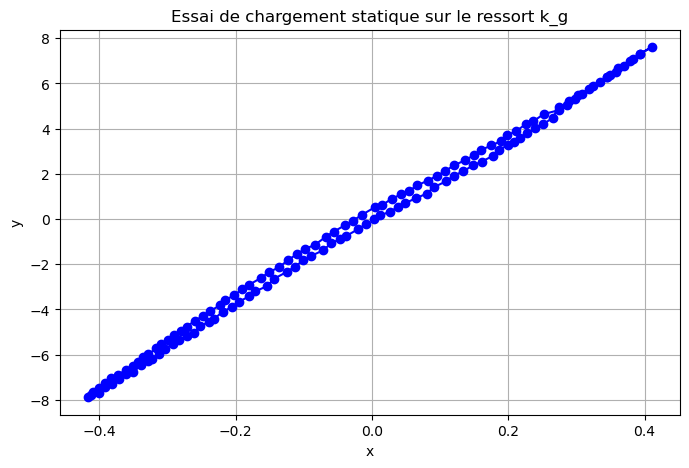

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
file_path = "statique.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, sep=",")
df.columns = df.columns.str.strip()

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(df["x"], df["y"], marker="o", linestyle="-", color="b")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Essai de chargement statique sur le ressort k_g")
plt.grid()
plt.show()

## 2. Étude des modes propres

On cherche les pulsations propres ( $omega_0$ en résolvant l’équation aux valeurs propres :

$$
\det(K - \omega_0^2 M) = 0
$$

### Travail demandé :

1. Écrire un script Python pour calculer les valeurs propres et les vecteurs propres du système en utilisant `numpy.linalg.eig`.
2. Comparez avec la valeur analytique de la plus basse des pusations propres

$$
\Omega^2 = \frac{1}{2}\left[\omega_1^2 + \omega_2^2 + k_g\left(\frac{1}{m} + \frac{1}{m_f} \right) \right] - \frac{1}{2} \displaystyle\sqrt{ \left[\omega_1^2 + \omega_2^2 + k_g\left(\frac{1}{m} + \frac{1}{m_f} \right) \right]^2 - 4 \left[ \omega_1^2 \omega_2^2 + k_g\left(\frac{\omega_1^2}{m} + \frac{\omega_2^2}{m_f} \right) \right]}
$$

avec $\omega_1^2 = \frac{k_1}{m_f}$ et $\omega_2^2 = \frac{k_a}{m}$.

3. Interpréter physiquement les modes propres obtenus.

La valeur $k_g$ précédente pose un problème, et elle est en conséquence modifiée pour une valeur $k_g = 13,7$ kN/mm que vous prendrez dans toute la suite. Pour cette valeur de $k_g$ , on obtient
$\Omega = 577$ rad/s. On supposera maintenant qu’il y a effectivement un amortissement c faible, mais non nul (voir modèle  (a) ).

## 3. Système amorti 

1. Écrire les équations du mouvement avec amortissement. Vous les mettrez sous la forme 

$$
M \ddot{U} + C \dot{U} + K U = F
$$

en définissant (et précisant) la matrice $C$.

## 4. Résolution numérique du mouvement

1. Implémenter la résolution du système avec `solve_ivp`, en considérant un système matriciel à résoudre
2. Tracer les déplacements des masses en fonction du temps pour des conditions initiales données.
3. Analyser l’influence du paramètre $\omega_f$, pulsation des oscillations forcées, sur la réponse temporelle.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres du système
mf, m = 33.0, 42.5
k1, kg, ka = 84.0E6, 20.0E6, 2.6E6
c = 0.1E6
F0 = 1.0  # Amplitude de la force (N)
omega = 577  # Fréquence de la force (rad/s)

# Matrices du système
M = np.array([[mf, 0], [0, m]])
C = np.array([[c, -c], [-c, c]])
K = np.array([[k1 + kg, -kg], [-kg, ka + kg]])

def system_forced(t, Y):
    """
    Système sous forme matricielle avec force externe appliquée à m1.
    """
    ### A remplir



# Conditions initiales
Y0 = [0.0, 0.0, 0.0, 0.0]  # [x1(0), x2(0), x1_dot(0), x2_dot(0)]

# Plage de temps pour la simulation
t_span = (0, 50)  # De 0 à 50 secondes
t_eval = np.linspace(t_span[0], t_span[1], 200)  # Points de temps pour l'évaluation

# Résolution du système
### A remplir

# Extraction des solutions
x1_forced = sol_forced.y[0]
x2_forced = sol_forced.y[1]

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(sol_forced.t, x1_forced, label='$x_1(t)$')
plt.plot(sol_forced.t, x2_forced, label='$x_2(t)$')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Réponse temporelle du système à deux degrés de liberté avec force externe')
plt.legend()
plt.grid(True)
plt.show()

#### Questions
1. Comment évolue le facteur d'amplification en fonction de la fréquence ?
2. Quel est l'effet de l'amortissement sur la résonance ?
3. Modifier la valeurs de `c` dans le code et observer les changements dans la courbe de réponse fréquentielle.
4. Identifier les fréquences de résonance et comparer avec les valeurs théoriques.
5. Quelle est l'influence du couplage entre les masses sur la réponse du système ?

#### Instructions
- Exécutez le code fourni pour générer la courbe de réponse fréquentielle.
- Analysez l'effet des coefficients d'amortissement sur le facteur d'amplification dynamique.
- Discutez des résultats obtenus en répondant aux questions ci-dessus.

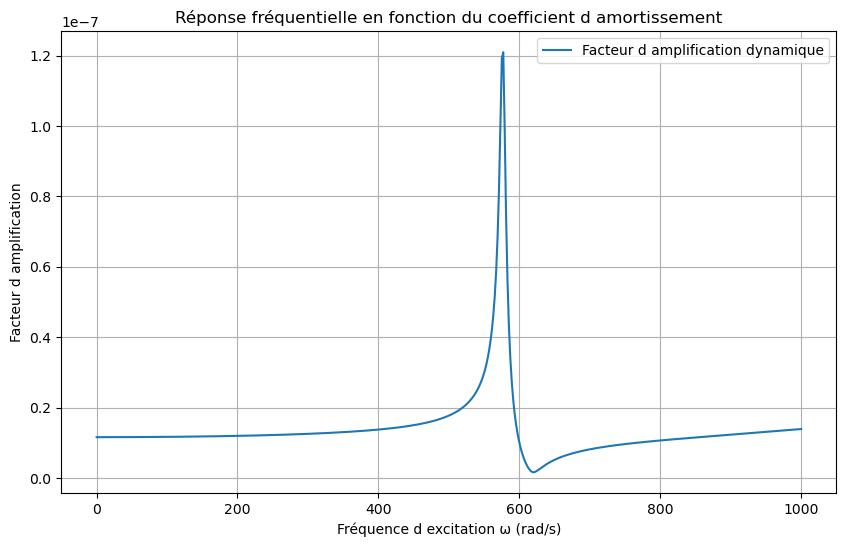

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres du système
mf, m = 33.0, 42.5
k1, kg, ka = 84.0E6, 13.7E6, 2.6E6
c = 0.5E3

# Matrices du système
M = np.array([[mf, 0], [0, m]])
C = np.array([[c, -c], [-c, c]])
K = np.array([[k1 + kg, -kg], [-kg, ka + kg]])

# Plage de fréquences pour l'analyse fréquentielle
omega_range = np.linspace(0.1, 1000, 500)
F0 = np.array([1.0, 0])  # Force appliquée sur la première masse uniquement

def compute_amplification_factor(omega):
    """
    Calcule le facteur d'amplification dynamique en fonction de la fréquence.
    """
    A = -omega**2 * M + 1j * omega * C + K
    X = np.linalg.solve(A, F0)  # Réponse en fréquence
    return np.abs(X[0])  # On s'intéresse à la première masse

# Calcul du facteur d'amplification pour chaque fréquence
amplification_factors = [compute_amplification_factor(omega) for omega in omega_range]

# Tracé du facteur d'amplification dynamique
plt.figure(figsize=(10, 6))
plt.plot(omega_range, amplification_factors, label='Facteur d amplification dynamique')

plt.xlabel('Fréquence d excitation ω (rad/s)')
plt.ylabel('Facteur d amplification')
plt.title('Réponse fréquentielle en fonction du coefficient d amortissement')
plt.legend()
plt.grid(True)
plt.show()